# Smart Watch Health Data

### import libraries

In [3]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Load data from local path downloaded from [Kaggle Dataset](https://www.kaggle.com/datasets/mohammedarfathr/smartwatch-health-data-uncleaned?resource=download)

In [5]:
smartWatch = pd.read_csv("unclean_smartwatch_health_data.csv") # By default, pd.read_csv() loads the CSV as a DataFrame
rows, columns = smartWatch.shape
print(f'Dataset Overview:\nTotal Rows: {rows}\nTotal Columns: {columns}')

Dataset Overview:
Total Rows: 10000
Total Columns: 7


### Inspect data

#### General info about this dataset

In [8]:
smartWatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9850 non-null   object 
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [9]:
head = smartWatch.head(10)
tail = smartWatch.tail(10)
smartWatch_headtail = pd.concat([head,tail])
smartWatch_headtail

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
5,2095.0,96.285938,94.202910,10205.992256,8.378342673824589,Highly_Active,10
6,4772.0,47.272257,95.389760,3208.781177,7.871146008904113,Seddentary,2
7,4092.0,81.733497,95.981343,6051.249857,5.224139066195455,Sedentary,1
8,3979.0,93.340338,97.218945,1775.029578,5.468413771417153,Seddentary,1
9,3169.0,51.409967,97.272787,7940.021452,7.9544989905339145,Seddentary,8


#### Brief Stats Summary and Unique Value Counts

In [11]:
print("Smart Watch Dataset Description: ")
print(smartWatch.describe())

Smart Watch Dataset Description: 
           User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count
count  9799.000000       9600.000000             9700.000000   9900.000000
mean   3007.480253         76.035462               97.841581   6985.685885
std    1150.581542         19.412483                1.732863   6885.809680
min    1001.000000         40.000000               90.791208      0.910138
25%    1997.500000         64.890152               96.662683   2021.039657
50%    2998.000000         75.220601               98.010642   4962.534599
75%    4004.000000         85.198249               99.376179   9724.902880
max    4999.000000        296.593970              100.000000  62486.690753


In [12]:
print("Unique Values in Smart Watch: ")
print(smartWatch.nunique())

Unique Values in Smart Watch: 
User ID                   3634
Heart Rate (BPM)          9517
Blood Oxygen Level (%)    8175
Step Count                9900
Sleep Duration (hours)    9604
Activity Level               6
Stress Level                11
dtype: int64


In [13]:
# How many people take measurements multiple times
user_counts = smartWatch['User ID'].value_counts().value_counts().sort_index()
print(user_counts)

count
1      848
2     1015
3      859
4      477
5      259
6      115
7       45
8       10
9        4
10       2
Name: count, dtype: int64


In [14]:
# what are all levels in activity level and stress level?
print(smartWatch['User ID'].value_counts()[smartWatch['User ID'].value_counts()>2])
print(smartWatch['Activity Level'].value_counts())
print()
print(smartWatch['Stress Level'].value_counts().sort_index())
print()
print(smartWatch['Sleep Duration (hours)'].value_counts())

User ID
3773.0    10
3708.0    10
1661.0     9
1018.0     9
4854.0     9
          ..
4323.0     3
2658.0     3
4478.0     3
1750.0     3
4141.0     3
Name: count, Length: 1771, dtype: int64
Activity Level
Seddentary       1676
Sedentary        1657
Highly Active    1650
Active           1643
Actve            1622
Highly_Active    1552
Name: count, dtype: int64

Stress Level
1             984
10            954
2            1007
3             995
4             966
5             945
6            1001
7            1006
8             917
9             976
Very High      49
Name: count, dtype: int64

Sleep Duration (hours)
ERROR                 247
7.167235622316564       1
3.461589105010967       1
8.225011860105145       1
7.77547280382428        1
                     ... 
3.324540624304736       1
5.485033179835436       1
7.809611926858791       1
6.5424774602354105      1
5.691001039740254       1
Name: count, Length: 9604, dtype: int64


#### Sleep Duration (hours) has mixed datatypes, look at non-float values

In [16]:
smartWatch['Sleep Duration (hours)'] = smartWatch['Sleep Duration (hours)'].astype(str)
non_digit = smartWatch['Sleep Duration (hours)'][~smartWatch['Sleep Duration (hours)'].apply(lambda x: x.replace('.', '', 1).isdigit())]
print(non_digit.value_counts())

Sleep Duration (hours)
ERROR                  247
nan                    150
-0.1944527906201543      1
Name: count, dtype: int64


### Check for Duplicate Rows

In [18]:
# Count duplicates
duplicate_count = smartWatch.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


## Data Cleaning

### Checking for Missing Data

In [21]:
missing_values = smartWatch.isnull().sum()  # Count missing values per column
print(missing_values)

User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)      0
Activity Level            200
Stress Level              200
dtype: int64


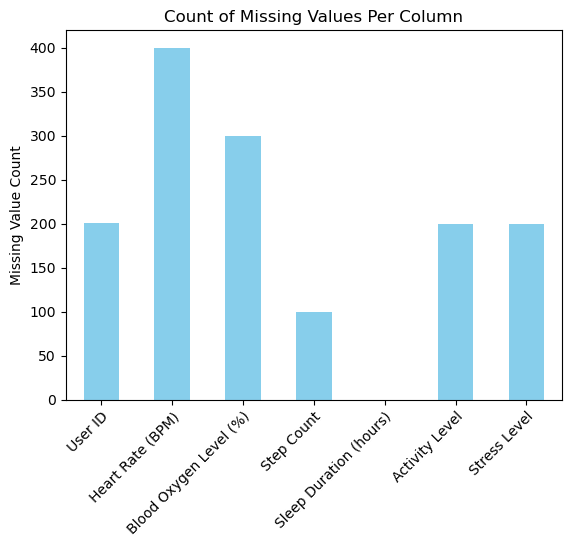

In [22]:
# Bar plot of missing values
missing_values.plot(kind='bar', color='skyblue')
plt.title("Count of Missing Values Per Column")
# change x axis ticks into angled text
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')  # ha='right' aligns the text properly (horizontal alignment)
plt.ylabel("Missing Value Count")
plt.show()

#### Where are these missing values located?

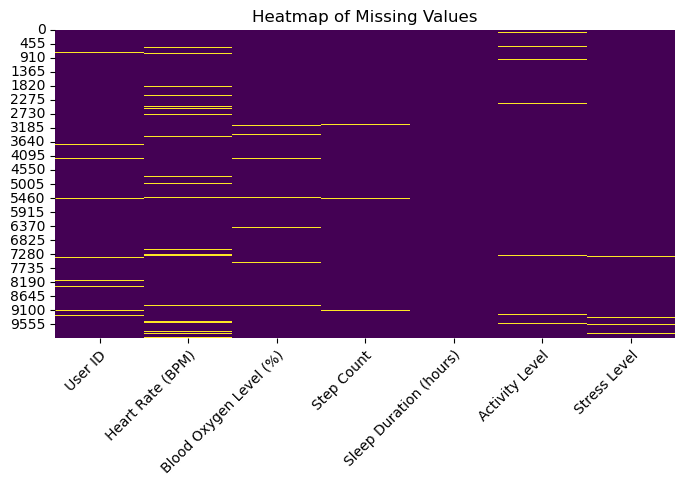

In [24]:
# Set figure size
plt.figure(figsize=(8, 4))
# plot heatmap for null values
sns.heatmap(smartWatch.isnull(), cbar=False, cmap='viridis')
# Add title
plt.title('Heatmap of Missing Values')
# change x axis ticks into angled text
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')  # ha='right' aligns the text properly (horizontal alignment)
# Show plot
plt.show()

#### Seems like the heatmap couldn't capture all missing values, therefore I use missingno module to see the whole map of missing values

<Axes: >

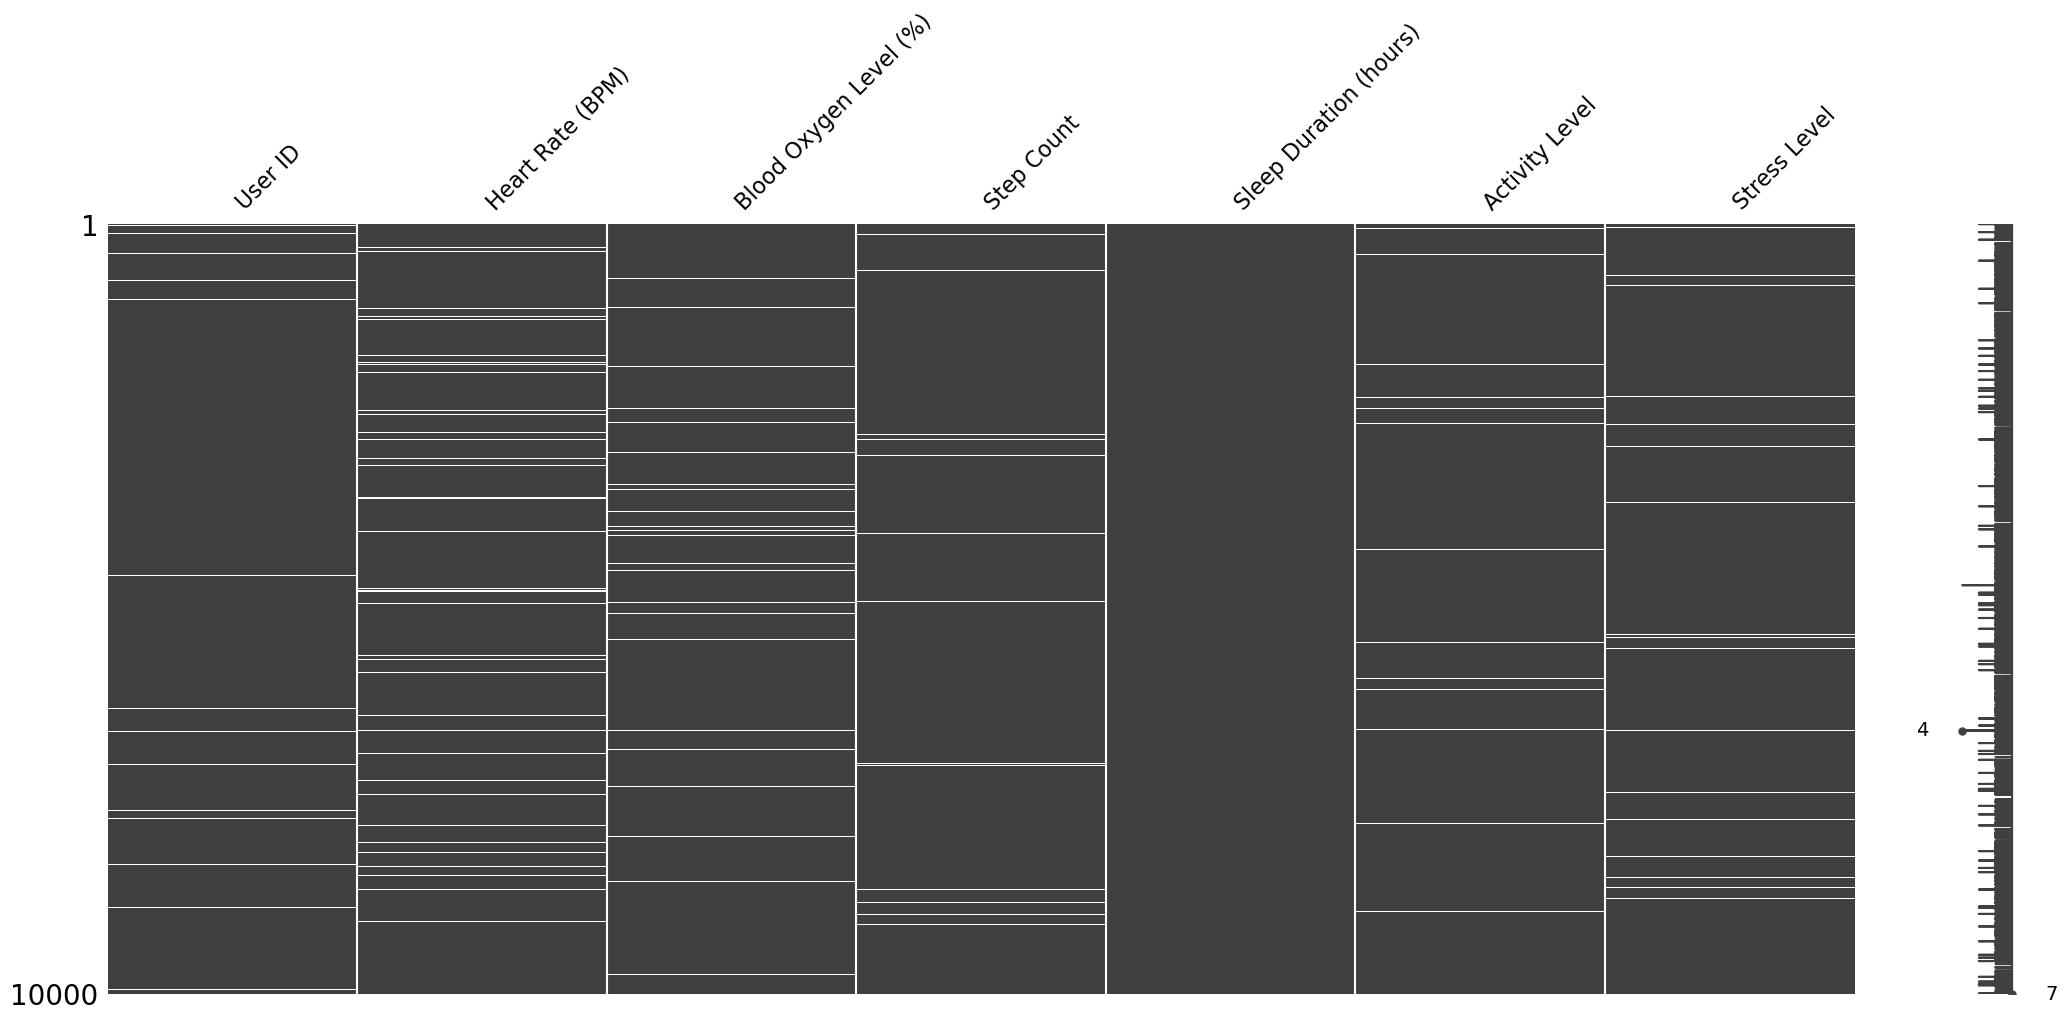

In [26]:
import missingno as msno
# Visualize missing data as a matrix
msno.matrix(smartWatch)

#### What are percentage of these missing values among all data?

In [28]:
missing_percentage = (missing_values / rows) * 100 # what percentage of each column among 10000 rows
for column, value in missing_percentage.items():
    print(f"{column:<30} {value:>0.2f}%")

User ID                        2.01%
Heart Rate (BPM)               4.00%
Blood Oxygen Level (%)         3.00%
Step Count                     1.00%
Sleep Duration (hours)         0.00%
Activity Level                 2.00%
Stress Level                   2.00%


### Handling Missing Data

1. User ID: since in this analysis we only care about mass data trend and relationship, therefore I'll use index to represent different individual, instead of their real user ID
2. For Heart Rate(BPM) and Step Count, I'll use avearage value to fill NaN values
3. For Blood Oxygen Level(%) and Sleep Duration (hours), I'll use mode value to fill NaN values, due to majority people would share similar patterns, I would expect less varibility in these features
4. For the categorical feature Activity Level, I'll use unknown to replace NaN to ensure integrity of data
5. For the categorical feature Stress Level, I'll convert all elevels in numbers and use average to fill NaN

In [31]:
# Use index instead of User ID
smartWatch_clean = smartWatch.drop('User ID', axis=1)

#### Correct Misspell Error in Activity Level

In [33]:
mapping = {
    'Seddentary': 'Sedentary',
    'Actve': 'Active',
    'Highly Active': 'Highly_Active'
          }
smartWatch_clean['Activity Level'] = smartWatch_clean['Activity Level'].replace(mapping)

### Data Imputation

In [35]:
# Fill NaN values in 'Heart Rate (BPM)' with the column's average
smartWatch_clean['Heart Rate (BPM)'] = smartWatch_clean['Heart Rate (BPM)'].fillna(smartWatch_clean['Heart Rate (BPM)'].mean())

# Fill NaN values in 'Step Count' with the column's average
smartWatch_clean['Step Count'] = smartWatch_clean['Step Count'].fillna(smartWatch_clean['Step Count'].mean())

In [36]:
# Fill NaN values in 'Blood Oxygen Level (%)' with the column's mode
smartWatch_clean['Blood Oxygen Level (%)'] = smartWatch_clean['Blood Oxygen Level (%)'].fillna(smartWatch_clean['Blood Oxygen Level (%)'].mode()[0])

In [37]:
# Fill NaN values in 'Activity Level' with 'unknown'
smartWatch_clean['Activity Level'] = smartWatch_clean['Activity Level'].fillna('unknown')

In [38]:
# Convert 'Stress Level' in numbers, replace 'very high' with 11
smartWatch_clean['Stress Level'] = smartWatch_clean['Stress Level'].replace('Very High', '11')
smartWatch_clean['Stress Level'] = pd.to_numeric(smartWatch_clean['Stress Level'], errors='coerce')

# Fill NaN values in 'Stress Level' with the column's average
smartWatch_clean['Stress Level'] = smartWatch_clean['Stress Level'].fillna(smartWatch_clean['Stress Level'].mean())

### Handling datatype and format

In [40]:
# change datatype in "Sleep Duration (hours)" in numbers and convert 'ERRORS' into NaN
smartWatch_clean['Sleep Duration (hours)']=pd.to_numeric(smartWatch_clean['Sleep Duration (hours)'], errors='coerce').round(2)

# convert 'Heart Rate (BPM)', 'Step Count' and 'Stress Level' into int, since normally these numbers should be integer
columns_to_int=['Heart Rate (BPM)', 'Step Count', 'Stress Level']
smartWatch_clean[columns_to_int] = smartWatch_clean[columns_to_int].astype(int)

# round 'Blood Oxygen Level (%)' into 2 decimals
smartWatch_clean['Blood Oxygen Level (%)'] = smartWatch_clean['Blood Oxygen Level (%)'].round(2)

### Handling negative value in 'Sleep Duration (hours)'

In [42]:
# Check statistic summary of 'Sleep Duration (hours)'
print(smartWatch_clean['Sleep Duration (hours)'].describe())

count    9603.000000
mean        6.505476
std         1.510023
min        -0.190000
25%         5.490000
50%         6.500000
75%         7.530000
max        12.140000
Name: Sleep Duration (hours), dtype: float64


In [43]:
# Most likely there was a typo in this negative data point, therefore I'll use abs to correct it in this case
smartWatch_clean['Sleep Duration (hours)'] = smartWatch_clean['Sleep Duration (hours)'].apply(lambda x: abs(x) if x < 0 else x)

### Data imputation for 'Sleep Duration (hours)'

In [45]:
# Fill NaN values in 'Blood Oxygen Level (%)' with the column's mode
smartWatch_clean['Sleep Duration (hours)'] = smartWatch_clean['Sleep Duration (hours)'].fillna(smartWatch_clean['Sleep Duration (hours)'].mode()[0])

### Detect Missing Data after imputation

In [47]:
missing_values = smartWatch_clean.isnull().sum()  # Count missing values per column
print(missing_values)

Heart Rate (BPM)          0
Blood Oxygen Level (%)    0
Step Count                0
Sleep Duration (hours)    0
Activity Level            0
Stress Level              0
dtype: int64


## Exploratory Data Analysis

In [49]:
# Display Cleaned Data
smartWatch_clean

,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,58,98.81,5450,7.17,Highly_Active,1
1,76,98.53,727,6.54,Highly_Active,5
2,247,97.05,2826,5.83,Highly_Active,5
3,40,96.89,13797,7.37,Active,3
4,61,98.58,15679,5.83,Highly_Active,6
...,...,...,...,...,...,...
9995,78,98.93,2948,7.40,Active,7
9996,48,95.77,4725,6.38,Sedentary,2
9997,73,97.95,2571,6.92,Sedentary,4
9998,76,98.40,3364,5.69,Active,8


In [50]:
# Statistic summary of the cleaned DataFrame
smartWatch_clean.describe().round(2)

,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Stress Level
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,75.56,97.91,6985.18,6.48,5.48
std,19.02,1.75,6851.29,1.49,2.86
min,40.00,90.79,0.00,0.19,1.00
25%,65.00,96.70,2037.00,5.54,3.00
50%,76.00,98.09,5023.50,6.42,5.00
75%,84.00,99.52,9679.50,7.48,8.00
max,296.00,100.00,62486.00,12.14,11.00


### Detect outliers

In [52]:
# Calculate the lower and upper bound for detecting outliers
data_to_detect = smartWatch_clean.drop(['Activity Level','Stress Level'], axis=1)
# Initialize an empty dictionary to store outlier counts
outlier_counts = {}
for column in data_to_detect.columns:
    Q1 = data_to_detect[column].quantile(0.25)  # 25th percentile (Q1)
    Q3 = data_to_detect[column].quantile(0.75)  # 75th percentile (Q3)
    IQR = Q3 - Q1  # Interquartile Range

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Optionally: Print bounds for clarity
    print(f"Column: {column}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}\n")
    
    # Identify outliers
    outliers = data_to_detect[(data_to_detect[column] < lower_bound) | (data_to_detect[column] > upper_bound)]
    
    # Count the outliers and store in the dictionary
    outlier_counts[column] = outliers[column].count()
    
# Print the number of outliers for each column
print("Outlier Counts for Each Column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Column: Heart Rate (BPM)
Lower Bound: 36.5, Upper Bound: 112.5

Column: Blood Oxygen Level (%)
Lower Bound: 92.47000000000001, Upper Bound: 103.74999999999999

Column: Step Count
Lower Bound: -9426.75, Upper Bound: 21143.25

Column: Sleep Duration (hours)
Lower Bound: 2.6299999999999994, Upper Bound: 10.39

Outlier Counts for Each Column:
Heart Rate (BPM): 98
Blood Oxygen Level (%): 24
Step Count: 453
Sleep Duration (hours): 74


### Handling Outliers

In [54]:
"""For biological ranges: Heart Rate should be between 40-220 bpm for normal people and athletes, 
whereas healthy people blood oxygen should be between 92-100%"""
# Remove rows outside biological boundaries for both Heart Rate and Blood Oxygen, these might be due to errors
smartWatch_clean = smartWatch_clean.loc[(smartWatch_clean['Heart Rate (BPM)'] >= 40) & (smartWatch_clean['Heart Rate (BPM)'] <= 220)]
smartWatch_clean = smartWatch_clean.loc[(smartWatch_clean['Blood Oxygen Level (%)'] >= 90) & (smartWatch_clean['Blood Oxygen Level (%)'] <= 100)]

In [55]:
# Check values above the upper bound of step count
smartWatch_clean[smartWatch_clean['Step Count']>21143.25].sort_values(by='Step Count', ascending=False)

,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
4018,85,95.73,62486,7.27,Sedentary,1
7967,65,98.59,62040,5.58,Active,8
3641,73,98.75,61299,6.69,Active,7
540,89,97.83,60278,8.38,Active,6
1125,69,97.59,57034,6.60,Sedentary,5
...,...,...,...,...,...,...
3098,67,100.00,21250,4.66,Active,1
2021,64,100.00,21247,5.63,Active,7
1601,103,94.09,21217,4.91,Highly_Active,10
2816,75,97.45,21172,6.96,Active,3


### After removing mismatch of Step count and Activity Level, I only have 3691 rows left, therefore I'd like to remove Activity Level instead since most likely it's not correctly labeled

In [57]:
"""
# For a person who walks more than 30000 steps but labeled as sedentary or only active is not correct, remove these data
smartWatch_clean = smartWatch_clean[~((smartWatch_clean['Step Count']>=30000) & (smartWatch_clean['Activity Level']!='Highly_Active'))]

# For a person who walks less than 15000 steps but labeled as highly_active is also false, remove these data as well
smartWatch_clean = smartWatch_clean[~((smartWatch_clean['Step Count']<=15000) & (smartWatch_clean['Activity Level']=='Highly_Active'))]

# Since for a Sedentary lifestyle, one has to walk less than 5000 steps
smartWatch_clean = smartWatch_clean[~((smartWatch_clean['Step Count']>=5000) & (smartWatch_clean['Activity Level']=='Sedentary'))]
smartWatch_clean = smartWatch_clean[~((smartWatch_clean['Step Count']<=5000) & (smartWatch_clean['Activity Level']!='Sedentary'))]

smartWatch_clean.sort_values(by='Step Count', ascending=False)
"""

"\n# For a person who walks more than 30000 steps but labeled as sedentary or only active is not correct, remove these data\nsmartWatch_clean = smartWatch_clean[~((smartWatch_clean['Step Count']>=30000) & (smartWatch_clean['Activity Level']!='Highly_Active'))]\n\n# For a person who walks less than 15000 steps but labeled as highly_active is also false, remove these data as well\nsmartWatch_clean = smartWatch_clean[~((smartWatch_clean['Step Count']<=15000) & (smartWatch_clean['Activity Level']=='Highly_Active'))]\n\n# Since for a Sedentary lifestyle, one has to walk less than 5000 steps\nsmartWatch_clean = smartWatch_clean[~((smartWatch_clean['Step Count']>=5000) & (smartWatch_clean['Activity Level']=='Sedentary'))]\nsmartWatch_clean = smartWatch_clean[~((smartWatch_clean['Step Count']<=5000) & (smartWatch_clean['Activity Level']!='Sedentary'))]\n\nsmartWatch_clean.sort_values(by='Step Count', ascending=False)\n"

### Drop 'Activity Level' and restrict 'Step Count' less than 30000 steps like most people do

In [59]:
smartWatch_clean = smartWatch_clean.drop('Activity Level', axis=1)

In [60]:
smartWatch_clean = smartWatch_clean[smartWatch_clean['Step Count']<=30000]
smartWatch_clean

,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Stress Level
0,58,98.81,5450,7.17,1
1,76,98.53,727,6.54,5
3,40,96.89,13797,7.37,3
4,61,98.58,15679,5.83,6
5,96,94.20,10205,8.38,10
...,...,...,...,...,...
9995,78,98.93,2948,7.40,7
9996,48,95.77,4725,6.38,2
9997,73,97.95,2571,6.92,4
9998,76,98.40,3364,5.69,8


### Correlation Coefficiency

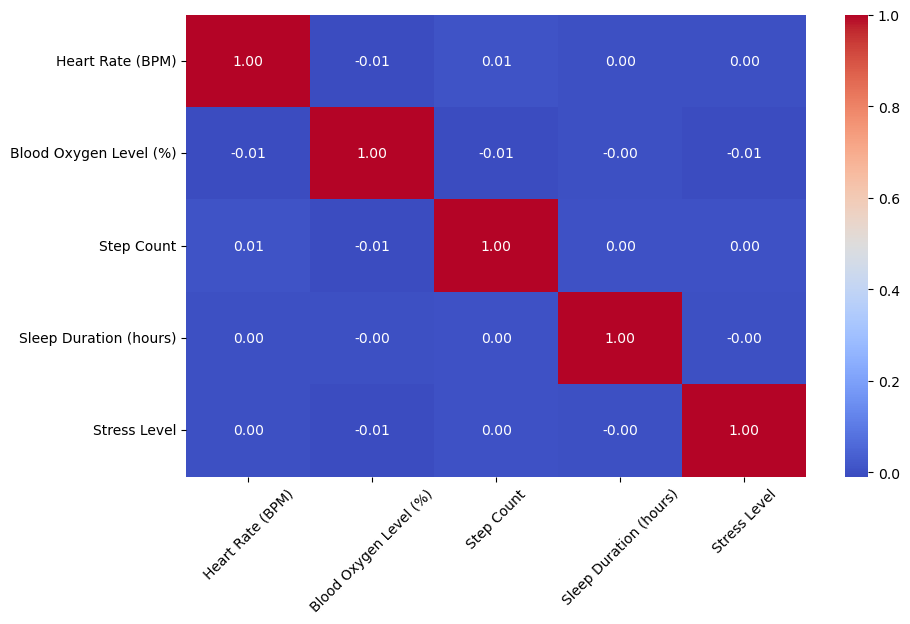

In [62]:
corr_matrix = smartWatch_clean.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

### Normalize and boxplot

In [64]:
scaler = MinMaxScaler()
normalized_df = smartWatch_clean.astype(float).copy()
normalized_df.iloc[:, :] = scaler.fit_transform(normalized_df)

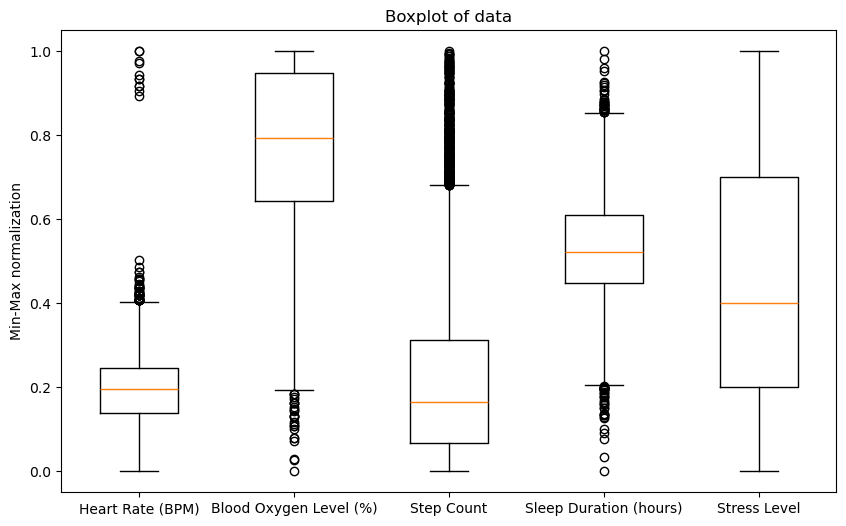

In [65]:
plt.figure(figsize=(10, 6))
plt.boxplot([normalized_df['Heart Rate (BPM)'], normalized_df['Blood Oxygen Level (%)'], normalized_df['Step Count'], normalized_df['Sleep Duration (hours)'], normalized_df['Stress Level']],labels=normalized_df.columns)
plt.title("Boxplot of data")
plt.ylabel("Min-Max normalization")
plt.show()

## How does stress level affect heart rate?

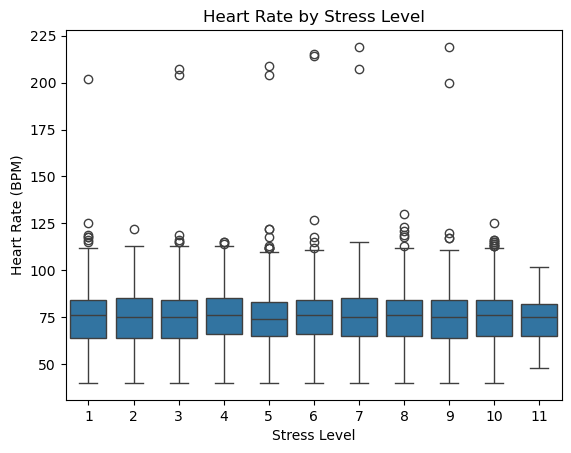

In [119]:
sns.boxplot(data=smartWatch_clean, x='Stress Level', y='Heart Rate (BPM)')
plt.title("Heart Rate by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Heart Rate (BPM)")
plt.show()

## Is there a correlation between sleep duration and step count?

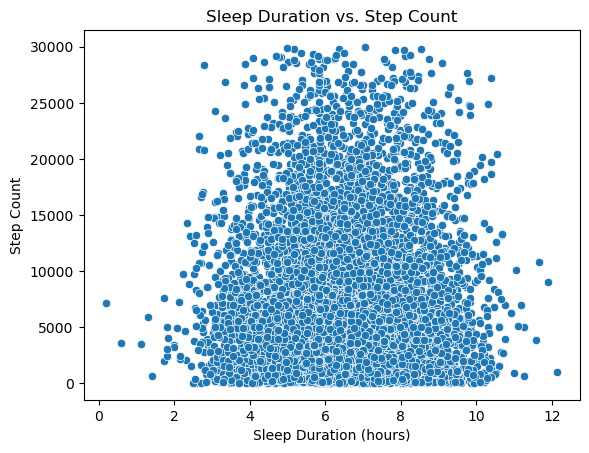

In [122]:
sns.scatterplot(data=smartWatch_clean, x='Sleep Duration (hours)', y='Step Count')
plt.title("Sleep Duration vs. Step Count")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Step Count")
plt.show()

## How does blood oxygen level vary across stress levels?

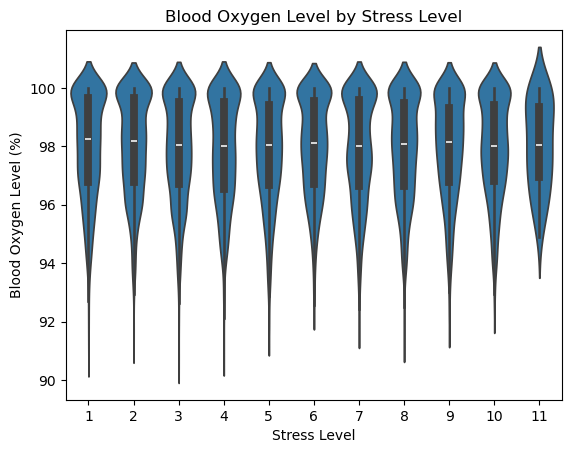

In [125]:
sns.violinplot(data=smartWatch_clean, x='Stress Level', y='Blood Oxygen Level (%)')
plt.title("Blood Oxygen Level by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Blood Oxygen Level (%)")
plt.show()

## How do heart rate variations correlate with and stress level and different activities?

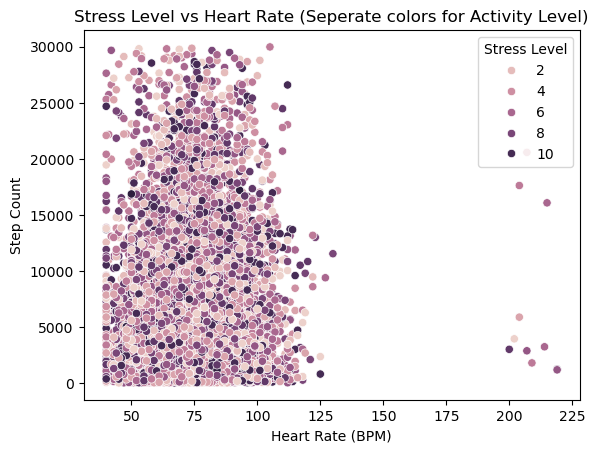

In [128]:
sns.scatterplot(x='Heart Rate (BPM)', y = 'Step Count', hue = 'Stress Level', data=smartWatch_clean)
plt.title('Stress Level vs Heart Rate (Seperate colors for Activity Level)')
plt.show()

## How does Activity level affect sleep duration

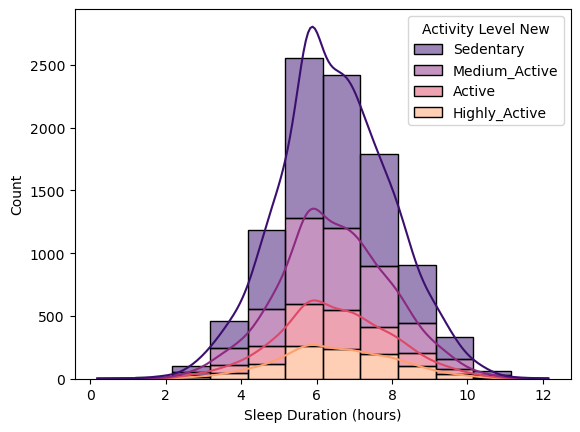

In [131]:
# Add a new column for Activity_Level_New
smartWatch_clean['Activity Level New'] = pd.cut(smartWatch_clean['Step Count'],
                       bins=[0,5000,10000,15000,np.inf],
                       labels = ['Sedentary', 'Medium_Active', 'Active', 'Highly_Active'])
sns.histplot(data=smartWatch_clean, x='Sleep Duration (hours)', hue='Activity Level New', multiple='stack', palette = 'magma', bins=30, kde=True, binwidth=1)
plt.show()

Conclusions: 

* There’s no visible correlation between any two variables in this dataset
* There’re a few individuals’ heart rate above the higher bound 220, which might indicate a tachycardia condition
* There’re a few individuals’ blood oxygen level below the lower bound 92, might indicate a health issue
* It would be nice to have age and time series data in this dataset, which could help interpret better
* Is Step Count correct recorded? Since there are values as single digits or toward 60000 steps